# **Problem Statement**
The captain of a cricket team needs a batsman with a stable performance, for a test series happening in England during winter. 

We are given the data of scores scored by two batsmen at different temperatures, and the captain must be suggested one batsman from the two with a proper reason using descriptive statistics.


---


**Understanding the problem**

Since it is a test match and not a oneday cricket or a T20 match, the captain would require a consistent batsman who can stick to the field rather than a mere hitter. Therefore, we must not just check for the average runs scored by the batsman but also how consistent and close is his score to the average. In statistical terms we need a batsman whose variation in scores is less, and not just a higher average in the scores.

In [ ]:
#Importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Creating Series of scores of the two batsmen and temperature as given

b1 = pd.Series([56, 19, 0, 68, 16, 67, 85, 101, 78])
b2 = pd.Series([60, 58, 38, 71, 69, 66, 68, 41, 67])
temp = pd.Series([31,33,30,35,34,15,10,7,11])

In [ ]:
#Creating a dataframe with the scores and temperature data

df = pd.DataFrame({
    "Batsman 1": b1,
    "Batsman 2": b2,
    "Temperature": temp
})
df

,Batsman 1,Batsman 2,Temperature
0,56,60,31
1,19,58,33
2,0,38,30
3,68,71,35
4,16,69,34
5,67,66,15
6,85,68,10
7,101,41,7
8,78,67,11


In [ ]:
#Having a quick look at the stats of the data
df.describe()

,Batsman 1,Batsman 2,Temperature
count,9.000000,9.000000,9.000000
mean,54.444444,59.777778,22.888889
std,34.817780,12.245180,11.783934
min,0.000000,38.000000,7.000000
25%,19.000000,58.000000,11.000000
50%,67.000000,66.000000,30.000000
75%,78.000000,68.000000,33.000000
max,101.000000,71.000000,35.000000


In [ ]:
#Finding out the score means(averages) of the two batsmen
m1 = df['Batsman 1'].mean()
m2 = df['Batsman 2'].mean()

#Finding the standard deviation of scores of the two batsmen
s1 = np.std(df['Batsman 1'])
s2 = np.std(df['Batsman 2'])

#Finding the coefficient of variance of scores of the two batsmen
cv1 = (s1*100)/m1
cv2 = (s2*100)/m2

In [ ]:
#Finding coefficient of variance of the dataframe variable
cv = lambda x: (np.std(x) / np.mean(x)) * 100 
df.apply(cv)

Batsman 1      60.293603
Batsman 2      19.312974
Temperature    48.538835
dtype: float64

**Plotting the Mean and Coefficient of Variance of the two batsmen**

Here we are trying to figure out whose average score is higher and also whose scores have less deviation from the mean, using coefficient of variance.

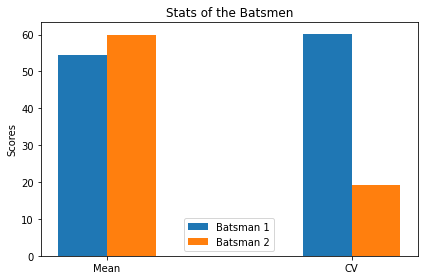

In [ ]:
#Creating three variables to plot
stats = ['Mean', 'CV'] #List with two labels f=of stats, 'Mean' & 'Coefficient of Variation'
batsman_1 = [m1, cv1] #List of the mean value and variation of Batsman 1
batsman_2 = [m2, cv2] #List of the mean value and variation of Batsman 2

#x-axis
x = np.arange(len(stats))
width = 0.2

#Using subplots
fig, ax = plt.subplots()
#Using bar plot to compare the Mean and Variation of the two Batsmen
rects1 = ax.bar(x-width/2, batsman_1, width, label='Batsman 1')
rects2 = ax.bar(x+width/2, batsman_2, width, label='Batsman 2')

#Adding Title and Labels
ax.set_title('Stats of the Batsmen')
ax.set_xticks(x)
ax.set_xticklabels(stats)
ax.set_ylabel('Scores')
ax.legend()

fig.tight_layout()
plt.show()

**Observation**

If we look at the graph above, we see that the Batsman 1 has a high score average, but also a higher coefficient of variance from the score average. On the other hand, we observe that Batsman 2 has a higher score average but less variance from the average score.

This helps us understand that Batsman 2 is more consistent with his score and performance. 

However, we now need to check for whose performance is better at lower temperatures. 

In [ ]:
#Sorting the dataframe by Temperature

df.sort_values(by='Temperature',
               axis=0,
               ascending=True,
               inplace=True)

In [ ]:
#Resetting the dataframe index
df.reset_index()

,index,Batsman 1,Batsman 2,Temperature
0,7,101,41,7
1,6,85,68,10
2,8,78,67,11
3,5,67,66,15
4,2,0,38,30
5,0,56,60,31
6,1,19,58,33
7,4,16,69,34
8,3,68,71,35


# Plotting: Batsmen Scores & Temperature

Let us plot the scores of each batsman seperately and see how their scores have varied during different temperature reading given in the data. 


**Note:** Now, let us remember that this possibly might not be a correlation, by which I mean to say that the temperature is possibly not effecting the scores of the batsmen, but let us consider this as an observation only based on the data given and nowhere consider it as though scores are dependant on the temperature.


We are only considering this as a performance under a wide range of temperature.

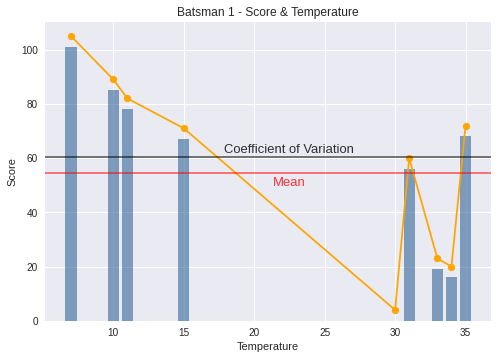

In [ ]:
#Defining the x and y axes
x = df['Temperature']
y1 = df['Batsman 1']

#Using a new list of y variable to maintain some gap between the bars and the line chart to make it visually appealing
y1_new = [i+4 for i in y1]

#Using the below code for design purpose
plt.style.use('seaborn')

fig, ax = plt.subplots()
#Plotting bar, line and scatter plots
plt.bar(x, y1, color=(0.2, 0.4, 0.6, 0.6), width=0.8)
plt.plot(x, y1_new, color='orange')
plt.scatter(x, y1_new, color='orange')
ax.axhline(y1.mean(), color='red', linewidth=2, alpha=0.5) #Horizontal line for Mean of the scores
ax.axhline(cv1, color='black', linewidth=2, alpha=0.5) #Horizontal line for Variation from the mean of the scores

#Adding Title and Labels
plt.title('Batsman 1 - Score & Temperature')
plt.xlabel('Temperature')
plt.ylabel('Score')
plt.text(22.5, 62, 'Coefficient of Variation',fontsize=13, color='black', horizontalalignment="center", alpha=0.8)
plt.text(22.5, 50, 'Mean',fontsize=13, color='red', horizontalalignment="center", alpha=0.8)

#Showing the plots made
plt.show()

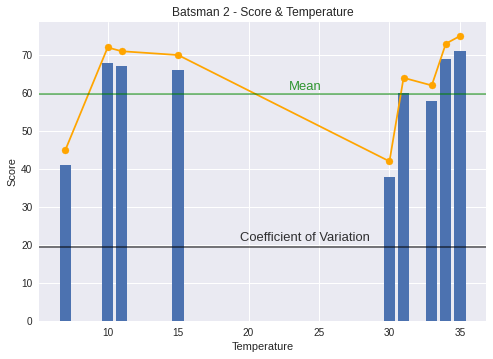

In [ ]:
#Defining the y axis (x-axis already defined above)
y2 = df['Batsman 2']

#Using a new list of y variable to maintain some gap between the bars and the line chart to make it visually appealing
y2_new = [i+4 for i in y2]

#Using the below code for design purpose
plt.style.use('seaborn')

fig, ax = plt.subplots()
#Plotting bar, line and scatter plots
plt.bar(x, y2, width=0.8)
plt.plot(x, y2_new, color='orange')
plt.scatter(x, y2_new, color='orange')

#plotting line for mean and coefficient of variance
ax.axhline(y2.mean(), color='green', linewidth=2, alpha=0.5)
ax.axhline(cv2, color='black', linewidth=2, alpha=0.5)

#Adding Title and Labels
plt.title('Batsman 2 - Score & Temperature')
plt.xlabel('Temperature')
plt.ylabel('Score')
plt.text(24, 21, 'Coefficient of Variation',fontsize=13, color='black', horizontalalignment="center", alpha=0.8)
plt.text(24, 61, 'Mean',fontsize=13, color='green', horizontalalignment="center", alpha=0.8)

#Showing the plots made
plt.show()

# Conclusion

**Suggestion**

Batsman 2 is more likely to perform with consistency in the test series happening in England during winter.

**Reasoning**



*   Batsman 2, when compared to Batsman 1, has more average score and less variance with respect to the mean of scores which helps us understand that he is more reliable and likely to score well and and stay consistent with his runs.
*   Batsman 2, when compared to Batsman 1, shows consistent scoring even during lower temperatures as per the graphs plotted above. We also see the higher score average (Mean) and lower variance (Coefficient of Variance) lines plotted in the graph.

